# _Session 4: Model Selection & Classical Machine Learning_

## _From Data to Predictions: Choosing the Right Algorithm_

## Learning Objectives
- Understand the difference between supervised and unsupervised learning
- Master classical classification algorithms and when to use each
- Learn clustering techniques for pattern discovery
- Evaluate model performance with appropriate metrics
- Apply cross-validation and hyperparameter tuning
- Develop intuition for model selection in real-world scenarios

## Why Model Selection Matters

**"There is no free lunch in machine learning"** — No single algorithm works best for all problems!

The right model depends on:
- **Data characteristics**: Size, dimensionality, noise level
- **Problem type**: Classification, regression, clustering
- **Performance requirements**: Accuracy vs speed vs interpretability
- **Domain constraints**: Explainability, computational resources

This session covers:
- ✅ **Classification**: Predicting categorical labels (supervised)
- ✅ **Clustering**: Discovering patterns without labels (unsupervised)
- ✅ **Model Evaluation**: Measuring what matters
- ✅ **Hyperparameter Tuning**: Optimizing model performance
- ✅ **Best Practices**: Avoiding common pitfalls

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Clustering models
from sklearn.cluster import KMeans, DBSCAN
# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report, roc_curve, roc_auc_score,
    silhouette_score, davies_bouldin_score, calinski_harabasz_score
)
from sklearn.preprocessing import StandardScaler
# Visualization
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.3.5
Pandas version: 2.3.3


## _Part 1: Supervised Learning — Classification_

### What is Classification?

**Classification** is the task of predicting a **categorical label** from input features.

**Examples:**
- 🏥 **Medical diagnosis**: Disease present (Yes/No)
- 📧 **Spam detection**: Spam or Not Spam
- 🎯 **Customer churn**: Will customer leave? (Yes/No)
- 📝 **Handwriting recognition**: Which digit (0-9)?

### Types of Classification:

| Type | Classes | Example |
|------|---------|----------|
| **Binary** | 2 classes | Disease (Yes/No), Spam (Spam/Ham) |
| **Multiclass** | 3+ classes | Digit recognition (0-9), Iris species (3 types) |
| **Multilabel** | Multiple labels per sample | Movie genres (Action, Comedy, Drama) |

### Dataset: Breast Cancer Wisconsin

We'll use the **Breast Cancer Wisconsin** dataset:
- **Task**: Binary classification (Malignant vs Benign)
- **Features**: 30 numeric features from cell nuclei measurements
- **Samples**: 569 samples
- **Classes**: 2 (Malignant=1, Benign=0)
- **Real-world importance**: Early cancer detection saves lives!

Dataset Information:
Number of samples: 569
Number of features: 30
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']... (showing first 5)
Classes: ['malignant' 'benign']
  - 0 = Malignant (cancer)
  - 1 = Benign (not cancer)

Class Distribution:
  malignant: 212 samples (37.3%)
  benign: 357 samples (62.7%)


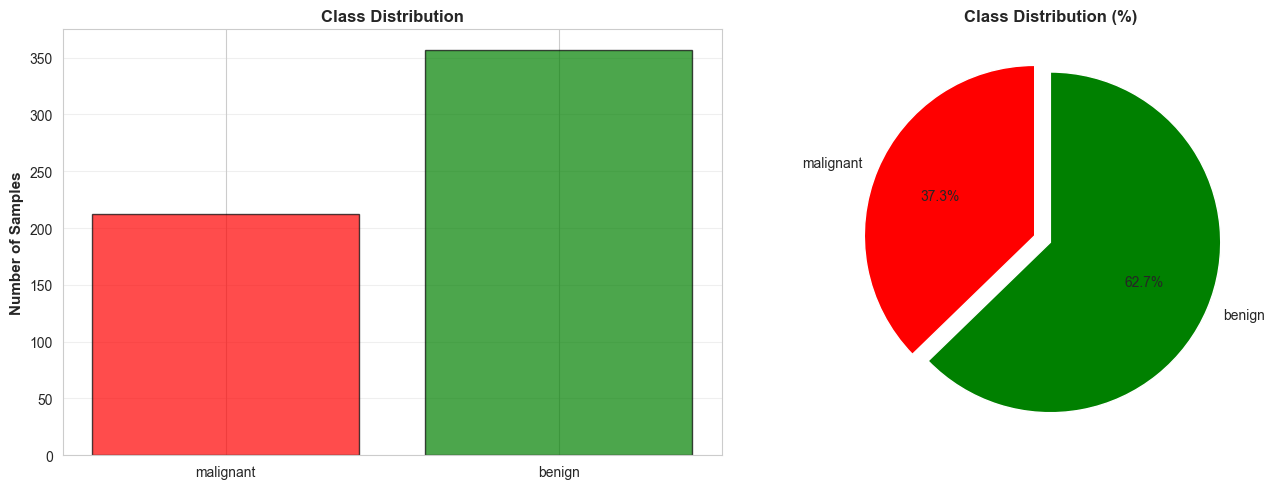


✓ Dataset is slightly imbalanced


In [2]:
# Load breast cancer dataset
cancer = datasets.load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

print("Dataset Information:")
print("="*80)
print(f"Number of samples: {X_cancer.shape[0]:,}")
print(f"Number of features: {X_cancer.shape[1]}")
print(f"Feature names: {cancer.feature_names[:5]}... (showing first 5)")
print(f"Classes: {cancer.target_names}")
print(f"  - 0 = Malignant (cancer)")
print(f"  - 1 = Benign (not cancer)")
print("="*80)

# Check class distribution
unique, counts = np.unique(y_cancer, return_counts=True)
print("\nClass Distribution:")
for cls, count in zip(cancer.target_names, counts):
    percentage = count / len(y_cancer) * 100
    print(f"  {cls}: {count:3d} samples ({percentage:.1f}%)")

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(cancer.target_names, counts, color=['red', 'green'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Number of Samples', fontsize=11, fontweight='bold')
axes[0].set_title('Class Distribution', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(counts, labels=cancer.target_names, autopct='%1.1f%%', 
            colors=['red', 'green'], startangle=90, explode=(0.1, 0))
axes[1].set_title('Class Distribution (%)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✓ Dataset is {'balanced' if abs(counts[0] - counts[1]) < 50 else 'slightly imbalanced'}")

### Train-Test Split: The Golden Rule

**NEVER test on training data!**

#### Why Split?
- **Training set**: Model learns patterns from this data
- **Test set**: Evaluates performance on **unseen** data
- Prevents **overfitting** (memorizing vs learning)

#### Common Split Ratios:
- **80-20**: 80% train, 20% test (most common)
- **70-30**: For smaller datasets
- **90-10**: For very large datasets

#### Important: Stratified Split
- Maintains class distribution in both sets
- Essential for imbalanced datasets
- Use `stratify=y` in train_test_split

In [3]:
# Split data (stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

print("Data Split:")
print("="*80)
print(f"Training set: {X_train.shape[0]:3d} samples ({X_train.shape[0]/X_cancer.shape[0]*100:.1f}%)")
print(f"Test set:     {X_test.shape[0]:3d} samples ({X_test.shape[0]/X_cancer.shape[0]*100:.1f}%)")

# Verify stratification worked
print("\nClass distribution in training set:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for cls, count in zip(cancer.target_names, counts_train):
    print(f"  {cls}: {count:3d} ({count/len(y_train)*100:.1f}%)")

print("\nClass distribution in test set:")
unique_test, counts_test = np.unique(y_test, return_counts=True)
for cls, count in zip(cancer.target_names, counts_test):
    print(f"  {cls}: {count:3d} ({count/len(y_test)*100:.1f}%)")

print("="*80)

# Scale features (important for distance-based algorithms!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Features standardized (mean=0, std=1)")
print(f"  Training mean: {X_train_scaled.mean():.6f}")
print(f"  Training std:  {X_train_scaled.std():.6f}")

Data Split:
Training set: 455 samples (80.0%)
Test set:     114 samples (20.0%)

Class distribution in training set:
  malignant: 170 (37.4%)
  benign: 285 (62.6%)

Class distribution in test set:
  malignant:  42 (36.8%)
  benign:  72 (63.2%)

✓ Features standardized (mean=0, std=1)
  Training mean: -0.000000
  Training std:  1.000000


## _Part 2: Classification Algorithms_

We'll explore 7 classical classification algorithms:

| # | Algorithm | Type | Strengths | Best For |
|---|-----------|------|-----------|----------|
| 1 | **Logistic Regression** | Linear | Fast, interpretable, probabilistic | Baseline, linear relationships |
| 2 | **K-Nearest Neighbors** | Instance-based | Simple, no training, nonlinear | Small datasets, irregular boundaries |
| 3 | **Decision Tree** | Tree-based | Interpretable, handles nonlinearity | Explainability needed |
| 4 | **Random Forest** | Ensemble | Robust, handles overfitting well | General purpose, high accuracy |
| 5 | **Support Vector Machine** | Kernel-based | Effective in high dimensions | Small-medium datasets |
| 6 | **Naive Bayes** | Probabilistic | Fast, works with small data | Text classification, real-time |

### Algorithm 1: Logistic Regression

#### What is Logistic Regression?
Despite its name, **Logistic Regression is a classification algorithm**, not regression!

- Uses **sigmoid function** to map predictions to [0, 1]
- Outputs **probabilities** for class membership
- Finds **linear decision boundary**

#### How it works:
1. Computes weighted sum: z = w₁x₁ + w₂x₂ + ... + b
2. Applies sigmoid: P(y=1) = 1 / (1 + e⁻ᶻ)
3. Classifies: y = 1 if P(y=1) ≥ 0.5, else y = 0

#### Key Properties:
- ✅ **Fast**: Trains quickly, even on large datasets
- ✅ **Interpretable**: Coefficients show feature importance
- ✅ **Probabilistic**: Gives confidence scores
- ✅ **No hyperparameters**: Works out-of-the-box
- ❌ **Linear only**: Can't capture complex nonlinear patterns
- ❌ **Assumes linear separability**: Struggles with XOR-like problems

#### When to use:
- **First algorithm to try** (baseline model)
- Need probability estimates
- Want interpretable coefficients
- Linear relationship between features and target

#### Main Parameters:
- **C**: Regularization strength (default=1.0)
  - Smaller C = stronger regularization = simpler model
  - Larger C = less regularization = more complex model

Training Logistic Regression...
Accuracy: 0.9825 (98.25%)

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



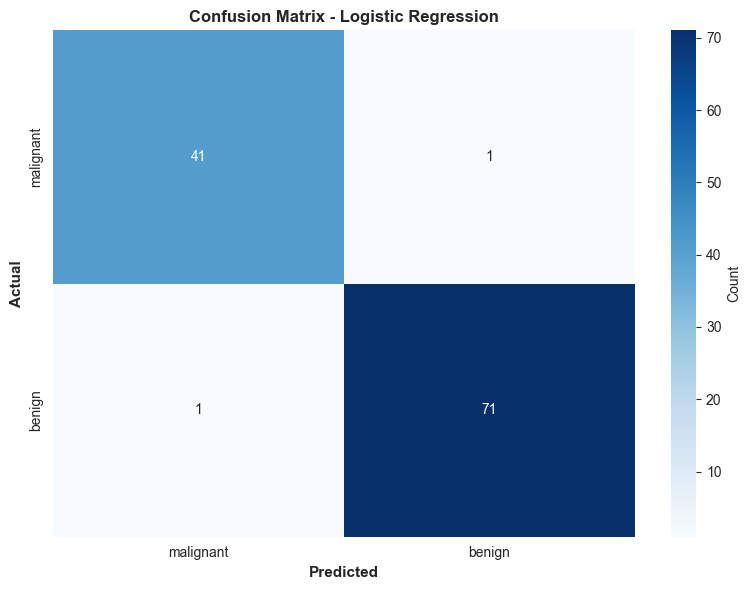


🔍 Observations:
  • Logistic Regression provides a strong baseline
  • Fast to train and easy to interpret
  • See confusion matrix for detailed performance


In [4]:
# Train Logistic Regression
print("Training Logistic Regression...")
lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Evaluate
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("="*80)
print(f"Accuracy: {accuracy_lr:.4f} ({accuracy_lr*100:.2f}%)")
print("="*80)

# Show classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=cancer.target_names))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

fig, ax = plt.subplots(figsize=(8, 6))

# Plot confusion matrix
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=cancer.target_names, yticklabels=cancer.target_names,
            ax=ax, cbar_kws={'label': 'Count'})
ax.set_xlabel('Predicted', fontsize=11, fontweight='bold')
ax.set_ylabel('Actual', fontsize=11, fontweight='bold')
ax.set_title('Confusion Matrix - Logistic Regression', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🔍 Observations:")
print("  • Logistic Regression provides a strong baseline")
print("  • Fast to train and easy to interpret")
print("  • See confusion matrix for detailed performance")

### Algorithm 2: K-Nearest Neighbors (KNN)

#### What is KNN?
**"You are the average of your k closest neighbors"**

- **Instance-based learning**: No explicit training phase
- **Lazy learner**: All computation happens at prediction time
- **Non-parametric**: Makes no assumptions about data distribution

#### How it works:
1. Store all training examples
2. For new point, find k nearest neighbors
3. Classify by majority vote

#### Key Properties:
- ✅ **Simple**: Easy to understand and implement
- ✅ **No training**: Just stores data
- ✅ **Nonlinear**: Captures complex decision boundaries
- ✅ **Adapts locally**: Different behavior in different regions
- ❌ **Slow at prediction**: Must compute distances to all points
- ❌ **Memory intensive**: Stores all training data
- ❌ **Curse of dimensionality**: Struggles in high dimensions
- ❌ **Sensitive to scale**: MUST standardize features!

#### When to use:
- Small to medium datasets
- Irregular decision boundaries
- Need simple, interpretable model
- Don't need fast predictions

#### Main Parameter:
- **n_neighbors (k)**: Number of neighbors to consider
  - Small k (1-5): Low bias, high variance (overfitting)
  - Large k (20-50): High bias, low variance (underfitting)
  - **Rule of thumb**: k = √n (square root of training samples)

Testing different k values for KNN...
k= 1: Accuracy = 0.9386 (93.86%)
k= 3: Accuracy = 0.9825 (98.25%)
k= 5: Accuracy = 0.9561 (95.61%)
k=10: Accuracy = 0.9649 (96.49%)
k=20: Accuracy = 0.9737 (97.37%)
k=50: Accuracy = 0.9474 (94.74%)

✓ Best k = 3 with accuracy = 0.9825


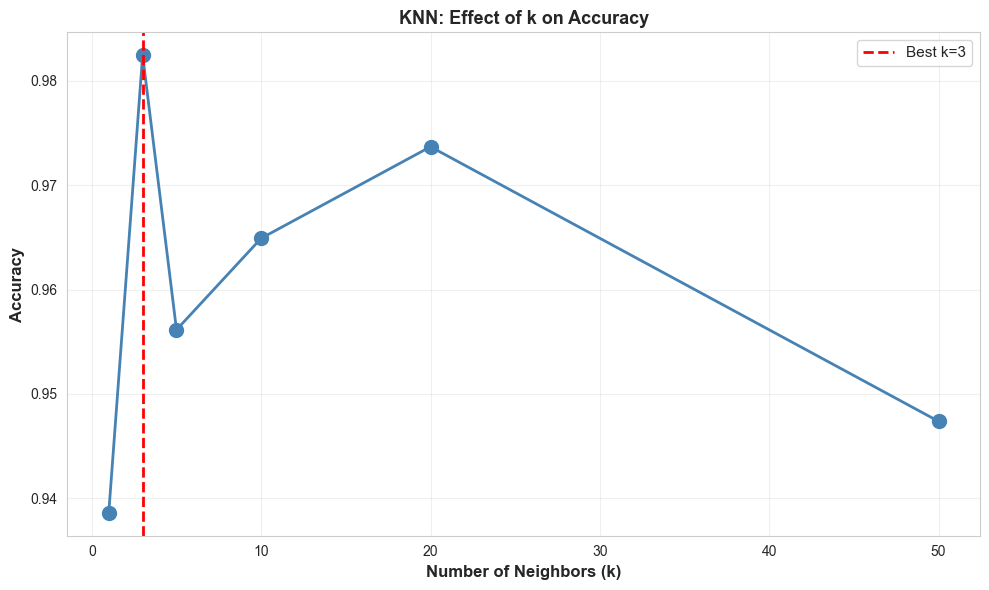


🔍 Observations:
  • Small k: More sensitive to noise (overfitting)
  • Large k: Smoother decision boundary (may underfit)
  • Sweet spot: Balance between bias and variance


In [5]:
# Try different k values
k_values = [1, 3, 5, 10, 20, 50]
knn_results = []

print("Testing different k values for KNN...")
print("="*80)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    knn_results.append({'k': k, 'accuracy': accuracy})
    print(f"k={k:2d}: Accuracy = {accuracy:.4f} ({accuracy*100:.2f}%)")

print("="*80)

# Find best k
best_result = max(knn_results, key=lambda x: x['accuracy'])
best_k = best_result['k']
print(f"\n✓ Best k = {best_k} with accuracy = {best_result['accuracy']:.4f}")

# Train with best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_knn = knn_best.predict(X_test_scaled)

# Visualize k vs accuracy
fig, ax = plt.subplots(figsize=(10, 6))
accuracies = [r['accuracy'] for r in knn_results]
ax.plot(k_values, accuracies, 'o-', linewidth=2, markersize=10, color='steelblue')
ax.axvline(best_k, color='red', linestyle='--', linewidth=2, label=f'Best k={best_k}')
ax.set_xlabel('Number of Neighbors (k)', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('KNN: Effect of k on Accuracy', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔍 Observations:")
print("  • Small k: More sensitive to noise (overfitting)")
print("  • Large k: Smoother decision boundary (may underfit)")
print("  • Sweet spot: Balance between bias and variance")

### Algorithm 3: Decision Tree

#### What is a Decision Tree?
**A tree of if-then-else rules** that splits data based on feature values.

- Hierarchical structure: root → branches → leaves
- Each node: a decision rule (e.g., "feature_X < threshold")
- Each leaf: a class prediction

#### How it works:
1. Find best feature and threshold to split data
2. Split data into two groups
3. Repeat recursively for each group
4. Stop when: max depth reached, or pure nodes, or min samples

#### Key Properties:
- ✅ **Highly interpretable**: Can visualize and explain decisions
- ✅ **No scaling needed**: Works with raw features
- ✅ **Handles nonlinearity**: Creates complex decision boundaries
- ✅ **Feature selection**: Automatically ignores irrelevant features
- ❌ **Prone to overfitting**: Can memorize training data
- ❌ **Unstable**: Small data changes → very different tree
- ❌ **Biased to dominant classes**: Needs balanced data

#### When to use:
- **Need interpretability** (medical, legal, financial)
- Mixed feature types (numerical + categorical)
- Want fast predictions
- Have enough data for splitting

#### Important Parameters:
- **max_depth**: Maximum tree depth (prevent overfitting)
- **min_samples_split**: Minimum samples to split a node
- **min_samples_leaf**: Minimum samples in leaf node

Testing different max_depth values for Decision Tree...
max_depth=2   : Train=0.9582, Test=0.8947, Gap=0.0635
max_depth=5   : Train=0.9934, Test=0.9211, Gap=0.0724
max_depth=10  : Train=1.0000, Test=0.9123, Gap=0.0877
max_depth=20  : Train=1.0000, Test=0.9123, Gap=0.0877
max_depth=None: Train=1.0000, Test=0.9123, Gap=0.0877


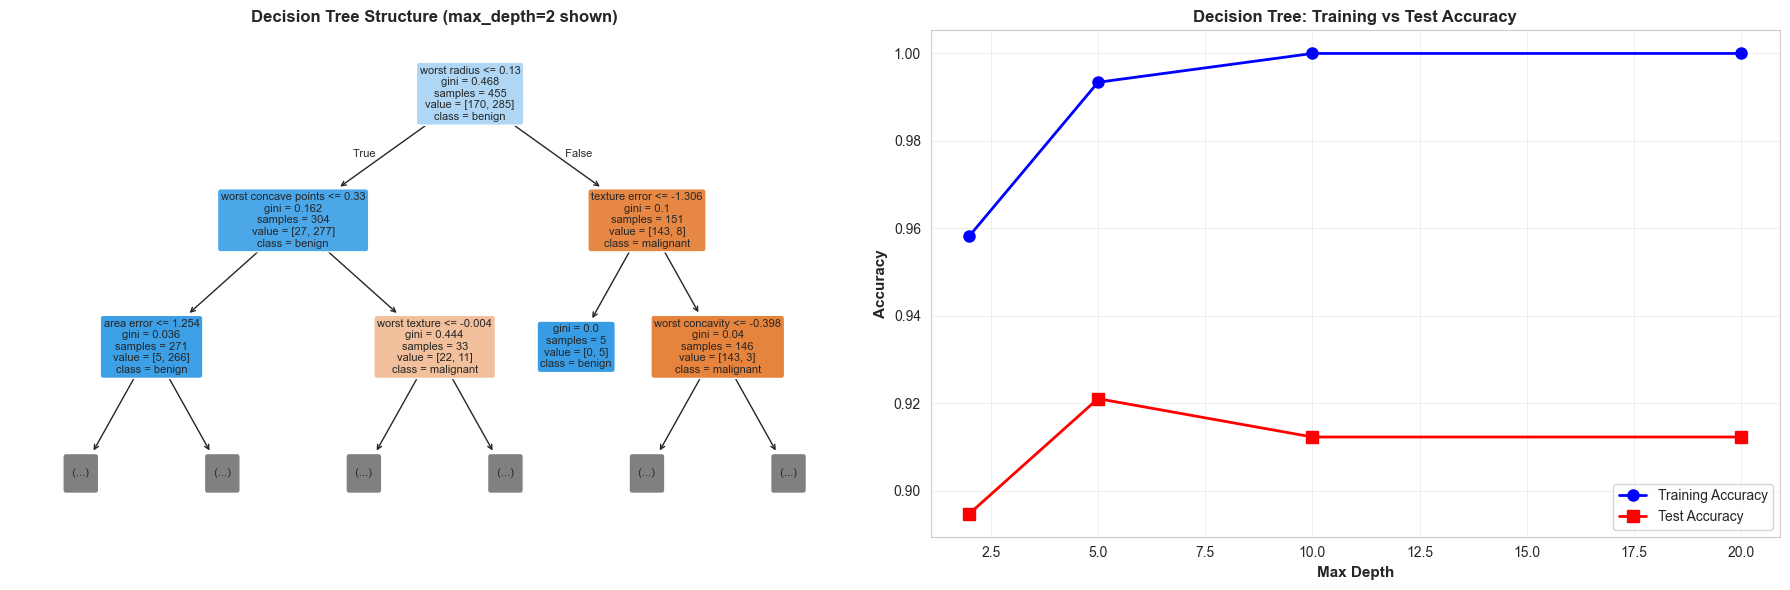


🔍 Observations:
  • Deeper trees: Higher training accuracy but may overfit
  • Gap between train and test: Sign of overfitting
  • Optimal depth: Balance accuracy and generalization


In [6]:
# Train Decision Tree with different max_depth
depths = [2, 5, 10, 20, None]
dt_results = []

print("Testing different max_depth values for Decision Tree...")
print("="*80)

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_scaled, y_train)
    
    train_acc = dt.score(X_train_scaled, y_train)
    test_acc = dt.score(X_test_scaled, y_test)
    
    dt_results.append({
        'depth': depth if depth else 'None',
        'train_acc': train_acc,
        'test_acc': test_acc
    })
    
    depth_str = str(depth) if depth else 'None'
    print(f"max_depth={depth_str:4s}: Train={train_acc:.4f}, Test={test_acc:.4f}, "
          f"Gap={train_acc-test_acc:.4f}")

print("="*80)

# Train with optimal depth (max_depth=5 to prevent overfitting)
dt_best = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_best.fit(X_train_scaled, y_train)
y_pred_dt = dt_best.predict(X_test_scaled)

# Visualize the tree (first few levels)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot tree structure
plot_tree(dt_best, max_depth=2, feature_names=cancer.feature_names,
          class_names=cancer.target_names, filled=True, ax=axes[0],
          fontsize=8, rounded=True)
axes[0].set_title('Decision Tree Structure (max_depth=2 shown)', 
                   fontsize=12, fontweight='bold')

# Plot overfitting analysis
depth_values = [r['depth'] for r in dt_results[:-1]]  # Exclude None
train_accs = [r['train_acc'] for r in dt_results[:-1]]
test_accs = [r['test_acc'] for r in dt_results[:-1]]

axes[1].plot(depth_values, train_accs, 'o-', linewidth=2, markersize=8, 
             label='Training Accuracy', color='blue')
axes[1].plot(depth_values, test_accs, 's-', linewidth=2, markersize=8,
             label='Test Accuracy', color='red')
axes[1].set_xlabel('Max Depth', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=11, fontweight='bold')
axes[1].set_title('Decision Tree: Training vs Test Accuracy', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 Observations:")
print("  • Deeper trees: Higher training accuracy but may overfit")
print("  • Gap between train and test: Sign of overfitting")
print("  • Optimal depth: Balance accuracy and generalization")

### Algorithm 4: Random Forest

#### What is Random Forest?
**"Wisdom of the crowd"** — An ensemble of decision trees that vote together.

- Trains many decision trees on **random subsets** of data
- Each tree uses **random subset of features**
- Final prediction: **majority vote** (classification) or average (regression)

#### How it works:
1. Create bootstrap sample (random sample with replacement)
2. Train decision tree on this sample
3. At each split, consider only random subset of features
4. Repeat for n_estimators trees
5. Combine predictions by voting

#### Key Properties:
- ✅ **Robust**: Resistant to overfitting (unlike single tree)
- ✅ **Accurate**: Often achieves excellent performance
- ✅ **Handles high dimensions**: Works with many features
- ✅ **Feature importance**: Measures which features matter most
- ✅ **Parallelizable**: Trees train independently
- ❌ **Less interpretable**: Can't easily visualize 100+ trees
- ❌ **Slower**: Trains and predicts with multiple trees
- ❌ **Memory intensive**: Stores many trees

#### When to use:
- **General-purpose algorithm** (works well on most problems)
- Want high accuracy without much tuning
- Have enough data and computational resources
- Can sacrifice some interpretability

#### Main Parameters:
- **n_estimators**: Number of trees (more = better, but slower)
- **max_depth**: Maximum depth of each tree
- **min_samples_split**: Minimum samples to split node
- **max_features**: Number of features to consider at each split

In [7]:
# Train Random Forest
print("Training Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("="*80)
print(f"Accuracy: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print(f"Number of trees: {rf.n_estimators}")
print("="*80)

# Number of trees vs accuracy
n_trees_range = range(10, 201, 10)
accuracies_train = []
accuracies_test = []

for n_trees in n_trees_range:
    rf_temp = RandomForestClassifier(n_estimators=n_trees, random_state=42, n_jobs=-1)
    rf_temp.fit(X_train_scaled, y_train)
    accuracies_train.append(rf_temp.score(X_train_scaled, y_train))
    accuracies_test.append(rf_temp.score(X_test_scaled, y_test))


Training Random Forest...
Accuracy: 0.9561 (95.61%)
Number of trees: 100


### Algorithm 5: Support Vector Machine (SVM)

#### What is SVM?
Finds the **optimal hyperplane** that maximizes the margin between classes.

- **Margin**: Distance between decision boundary and nearest points
- **Support vectors**: Data points closest to the boundary
- **Kernel trick**: Transforms data to higher dimensions for nonlinear separation

#### How it works:
1. Find hyperplane that separates classes
2. Maximize margin (distance to nearest points)
3. Use kernel for nonlinear boundaries (RBF, polynomial)
4. Only support vectors matter for decision boundary

#### Key Properties:
- ✅ **Effective in high dimensions**: Works well with many features
- ✅ **Memory efficient**: Uses only support vectors
- ✅ **Kernel trick**: Handles nonlinear problems elegantly
- ✅ **Robust**: Less prone to overfitting with proper C
- ❌ **Slow on large datasets**: O(n²) to O(n³) complexity
- ❌ **Sensitive to scaling**: MUST standardize features!
- ❌ **Black box with kernels**: Hard to interpret
- ❌ **Requires tuning**: C and gamma parameters critical

#### When to use:
- Small to medium datasets (< 10,000 samples)
- High-dimensional data
- Clear margin of separation exists
- Binary classification (works best)

#### Main Parameters:
- **C**: Regularization (smaller = more regularization)
- **kernel**: 'linear', 'rbf', 'poly'
- **gamma**: Kernel coefficient for 'rbf' (smaller = smoother)

In [8]:
# Train SVM with RBF kernel
print("Training Support Vector Machine (RBF kernel)...")
svm = SVC(kernel='rbf', random_state=42, probability=True)
svm.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("="*80)
print(f"Accuracy: {accuracy_svm:.4f} ({accuracy_svm*100:.2f}%)")
print(f"Number of support vectors: {svm.n_support_}")
print(f"  Class 0: {svm.n_support_[0]}")
print(f"  Class 1: {svm.n_support_[1]}")
print("="*80)

Training Support Vector Machine (RBF kernel)...
Accuracy: 0.9825 (98.25%)
Number of support vectors: [51 46]
  Class 0: 51
  Class 1: 46


### Algorithm 6: Naive Bayes

#### What is Naive Bayes?
Applies **Bayes' Theorem** with a "naive" assumption: all features are independent.

- Probabilistic classifier
- Computes P(class | features) using Bayes' rule
- Assumes features are conditionally independent ("naive")

#### How it works:
1. Calculate prior probability P(class)
2. Calculate likelihood P(features | class)
3. Apply Bayes' theorem: P(class | features) ∝ P(features | class) × P(class)
4. Classify to class with highest posterior probability

#### Key Properties:
- ✅ **Very fast**: Training and prediction both fast
- ✅ **Works with small data**: Doesn't need large training sets
- ✅ **Handles high dimensions**: Works well with many features
- ✅ **Probabilistic**: Gives confidence scores
- ❌ **Independence assumption**: Rarely true in practice
- ❌ **Can be biased**: If assumption violated

#### When to use:
- **Text classification** (spam detection, sentiment analysis)
- Real-time predictions needed
- Small training dataset
- Baseline model

#### Variants:
- **GaussianNB**: For continuous features (assumes Gaussian distribution)
- **MultinomialNB**: For count data (word frequencies)
- **BernoulliNB**: For binary features

In [9]:
# Train Naive Bayes
print("Training Gaussian Naive Bayes...")
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predictions
y_pred_nb = nb.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Accuracy: {accuracy_nb:.4f} ({accuracy_nb*100:.2f}%)")

Training Gaussian Naive Bayes...
Accuracy: 0.9298 (92.98%)


## _Part 3: Model Comparison & Evaluation_

Let's compare all algorithms side-by-side!

Model Comparison:
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.982456   0.986111 0.986111  0.986111
K-Nearest Neighbors  0.982456   0.972973 1.000000  0.986301
          SVM (RBF)  0.982456   0.986111 0.986111  0.986111
      Random Forest  0.956140   0.958904 0.972222  0.965517
        Naive Bayes  0.929825   0.944444 0.944444  0.944444
      Decision Tree  0.921053   0.956522 0.916667  0.936170


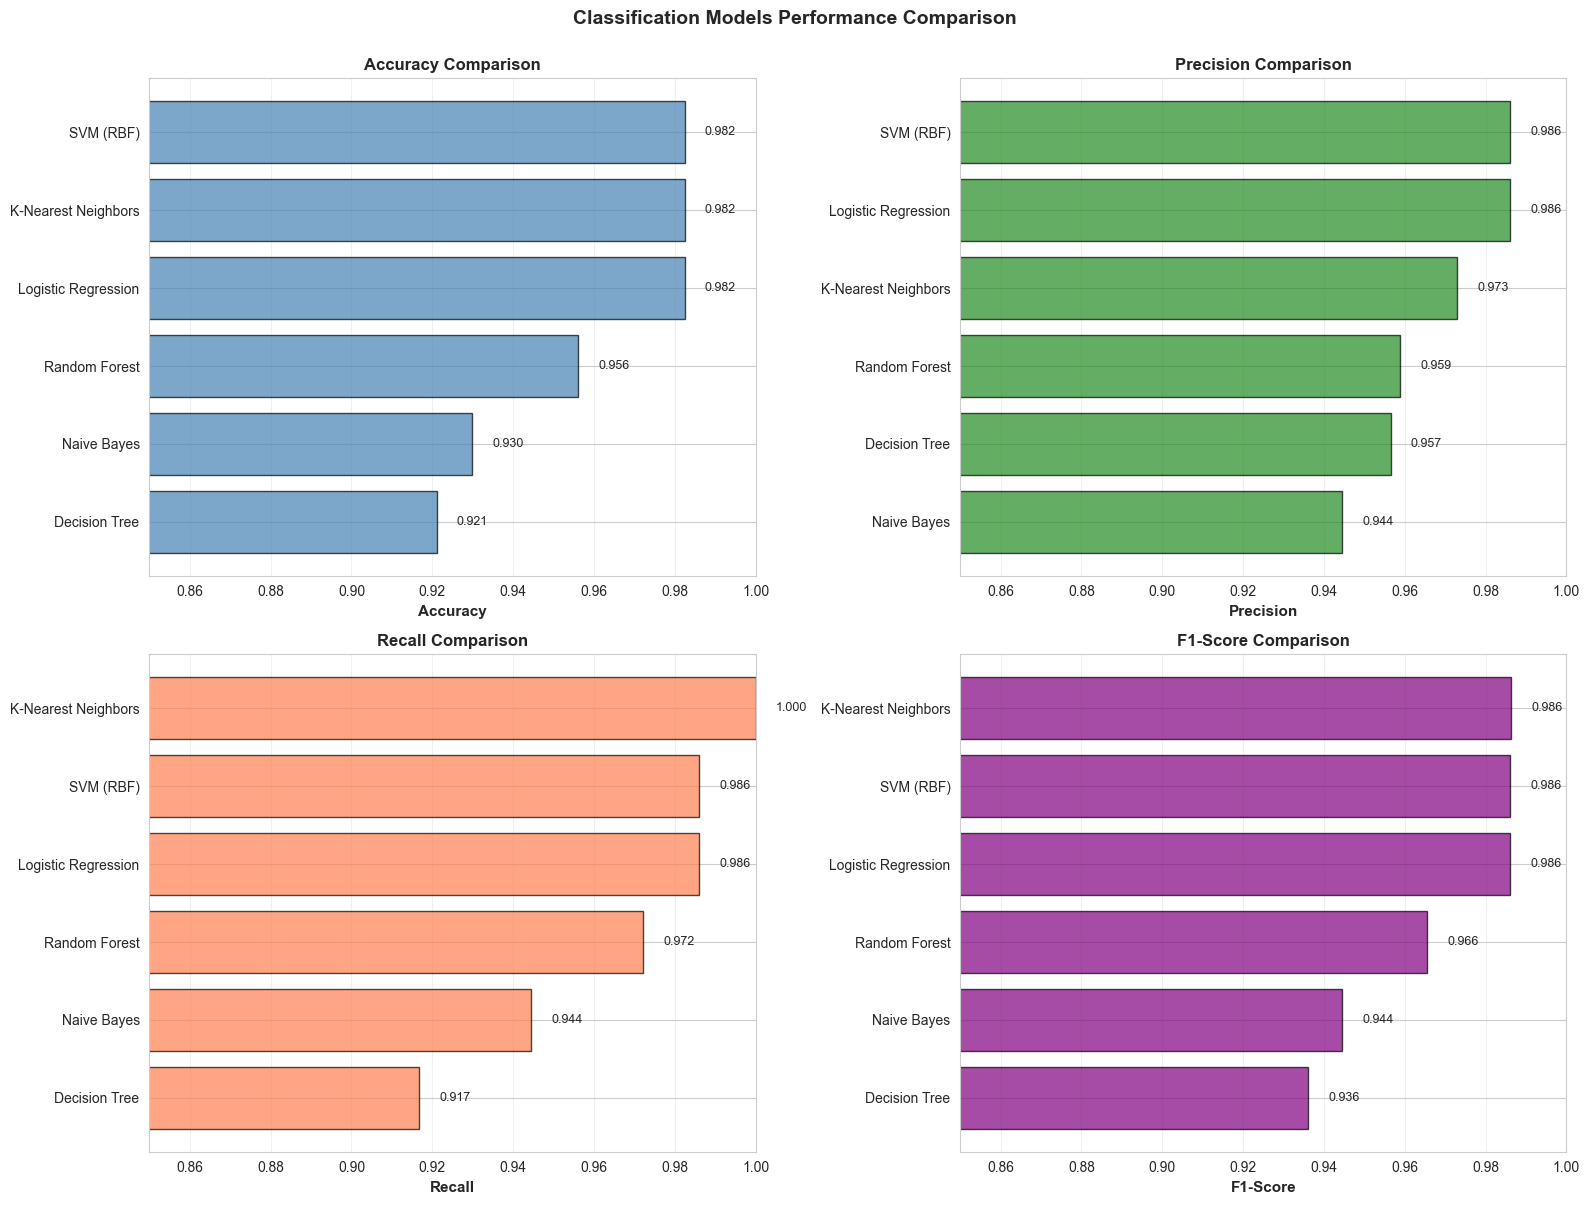


🏆 Best Model: Logistic Regression
   Accuracy: 0.9825
   F1-Score: 0.9861


In [10]:
# Compile all results
models = {
    'Logistic Regression': y_pred_lr,
    'K-Nearest Neighbors': y_pred_knn,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'SVM (RBF)': y_pred_svm,
    'Naive Bayes': y_pred_nb
}

# Calculate metrics for each model
results = []
for name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Create DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("Model Comparison:")
print("="*90)
print(results_df.to_string(index=False))
print("="*90)

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['steelblue', 'forestgreen', 'coral', 'purple']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 2, idx % 2]
    
    # Sort by metric
    sorted_df = results_df.sort_values(metric, ascending=True)
    
    ax.barh(range(len(sorted_df)), sorted_df[metric], color=color, 
            edgecolor='black', alpha=0.7)
    ax.set_yticks(range(len(sorted_df)))
    ax.set_yticklabels(sorted_df['Model'], fontsize=10)
    ax.set_xlabel(metric, fontsize=11, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_xlim([0.85, 1.0])
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, val in enumerate(sorted_df[metric]):
        ax.text(val + 0.005, i, f'{val:.3f}', va='center', fontsize=9)

plt.suptitle('Classification Models Performance Comparison', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Find best model
best_model = results_df.iloc[0]
print(f"\n🏆 Best Model: {best_model['Model']}")
print(f"   Accuracy: {best_model['Accuracy']:.4f}")
print(f"   F1-Score: {best_model['F1-Score']:.4f}")

### Understanding Evaluation Metrics

#### Confusion Matrix:

```
                Predicted
                Neg   Pos
Actual  Neg     TN    FP
        Pos     FN    TP
```

- **TN (True Negative)**: Correctly predicted negative
- **TP (True Positive)**: Correctly predicted positive  
- **FN (False Negative)**: Incorrectly predicted negative (Type II error)
- **FP (False Positive)**: Incorrectly predicted positive (Type I error)

#### Key Metrics:

| Metric | Formula | Meaning | When to Use |
|--------|---------|---------|-------------|
| **Accuracy** | (TP + TN) / Total | Overall correctness | Balanced classes |
| **Precision** | TP / (TP + FP) | "Of predicted positives, how many correct?" | When FP is costly |
| **Recall** | TP / (TP + FN) | "Of actual positives, how many found?" | When FN is costly |
| **F1-Score** | 2 × (Prec × Rec) / (Prec + Rec) | Harmonic mean of precision & recall | Balance between Prec & Rec |

#### Which Metric to Use?

**Medical Diagnosis (Cancer Detection)**:
- ✅ **Recall** is critical (minimize False Negatives)
- Missing a cancer case is very dangerous!

**Spam Detection**:
- ✅ **Precision** is important (minimize False Positives)
- Marking important email as spam is bad!

**General Case**:
- ✅ **F1-Score** balances both
- ✅ **Accuracy** when classes are balanced

## _Part 4: Unsupervised Learning — Clustering_

### What is Clustering?

**Clustering** finds natural groupings in data **without labels**.

**Applications:**
- 🛒 **Customer segmentation**: Group similar customers
- 🧬 **Gene expression**: Find gene groups with similar behavior
- 📄 **Document organization**: Group similar documents
- 🌍 **Anomaly detection**: Find outliers (points not in any cluster)

### Clustering Algorithms:

| Algorithm | Type | Strengths | Best For |
|-----------|------|-----------|----------|
| **K-Means** | Centroid-based | Fast, scalable | Spherical clusters, known k |
| **DBSCAN** | Density-based | Finds arbitrary shapes | Irregular clusters, noise |

### Dataset: Digits (Without Labels)

We'll cluster the digits dataset **without using labels**, then compare with true labels.

In [11]:
# Load digits dataset
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X_digits = digits.data
y_digits_true = digits.target  # True labels (for evaluation only!)

print("Clustering Dataset Information:")
print("="*80)
print(f"Number of samples: {X_digits.shape[0]:,}")
print(f"Number of features: {X_digits.shape[1]} (8×8 pixels)")
print(f"True number of classes: {len(np.unique(y_digits_true))} (digits 0-9)")
print("="*80)

# Standardize
scaler_digits = StandardScaler()
X_digits_scaled = scaler_digits.fit_transform(X_digits)

# Reduce to 2D for visualization (using PCA)
pca = PCA(n_components=2, random_state=42)
X_digits_2d = pca.fit_transform(X_digits_scaled)

print(f"\n✓ Reduced to 2D for visualization")
print(f"  Variance explained: {pca.explained_variance_ratio_.sum()*100:.2f}%")

Clustering Dataset Information:
Number of samples: 1,797
Number of features: 64 (8×8 pixels)
True number of classes: 10 (digits 0-9)

✓ Reduced to 2D for visualization
  Variance explained: 21.59%


### Algorithm 1: K-Means Clustering

#### What is K-Means?
Partitions data into **k clusters** by minimizing within-cluster variance.

#### How it works:
1. Initialize k centroids randomly
2. Assign each point to nearest centroid
3. Update centroids to mean of assigned points
4. Repeat steps 2-3 until convergence

#### Key Properties:
- ✅ **Fast**: O(n×k×d) complexity
- ✅ **Scalable**: Works with millions of points
- ✅ **Simple**: Easy to understand and implement
- ❌ **Need to specify k**: Must know/guess number of clusters
- ❌ **Assumes spherical clusters**: Struggles with irregular shapes
- ❌ **Sensitive to initialization**: Can get stuck in local minima
- ❌ **Affected by outliers**: Outliers shift centroids

#### When to use:
- Know approximate number of clusters
- Clusters are roughly spherical
- Large dataset
- Need fast algorithm

#### Main Parameter:
- **n_clusters (k)**: Number of clusters to form

Running K-Means clustering...
K-Means Results (k=10):
  Adjusted Rand Index (ARI): 0.5344
  Normalized Mutual Info (NMI): 0.6712
  Silhouette Score: 0.1394
  Inertia: 69813.56


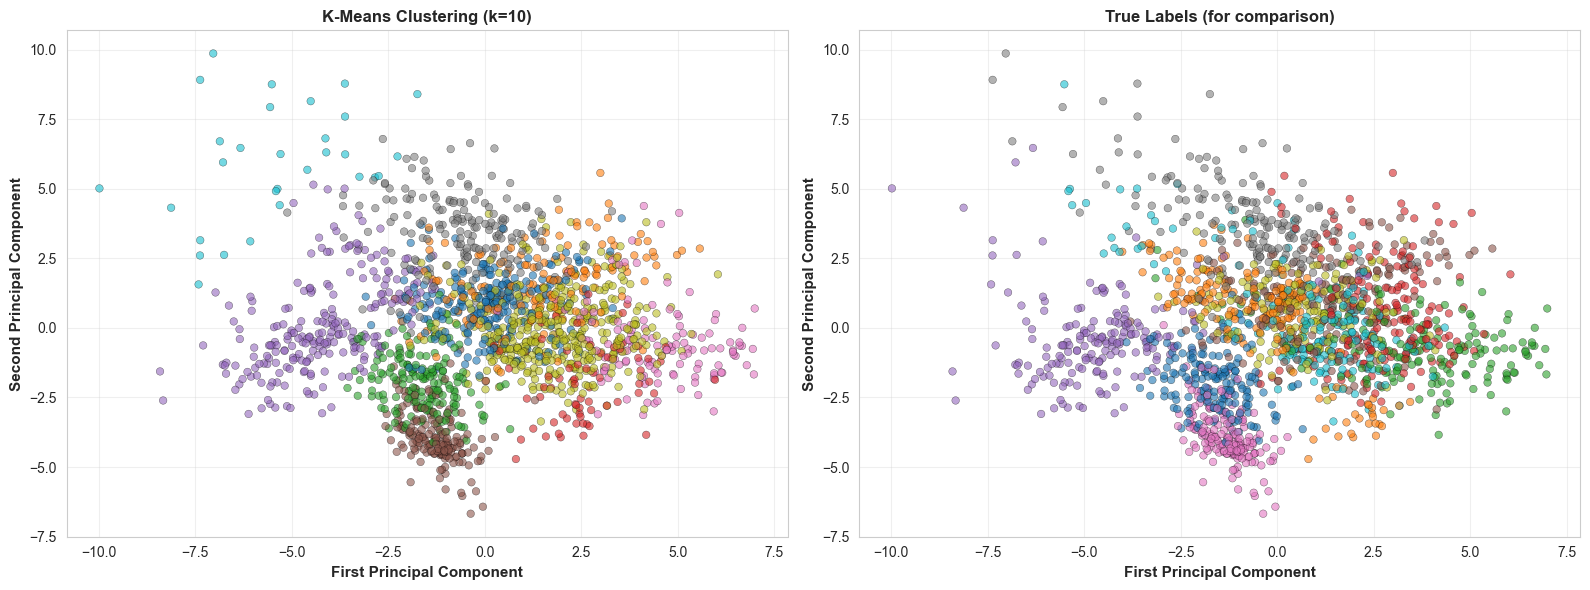


🔍 Observations:
  • K-Means found clusters similar to true digit groups
  • Some digits overlap (e.g., 4 and 9, 3 and 8)
  • No labels were used — purely from data patterns!


In [12]:
# K-Means with k=10 (we know there are 10 digits)
print("Running K-Means clustering...")
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_digits_scaled)

# Evaluation (using true labels for comparison)
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(y_digits_true, y_kmeans)
nmi = normalized_mutual_info_score(y_digits_true, y_kmeans)
silhouette = silhouette_score(X_digits_scaled, y_kmeans)

print("="*80)
print(f"K-Means Results (k=10):")
print(f"  Adjusted Rand Index (ARI): {ari:.4f}")
print(f"  Normalized Mutual Info (NMI): {nmi:.4f}")
print(f"  Silhouette Score: {silhouette:.4f}")
print(f"  Inertia: {kmeans.inertia_:.2f}")
print("="*80)

# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means clusters
scatter1 = axes[0].scatter(X_digits_2d[:, 0], X_digits_2d[:, 1], c=y_kmeans, 
                           cmap='tab10', alpha=0.6, s=30, edgecolors='black', linewidth=0.3)
axes[0].set_xlabel('First Principal Component', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Second Principal Component', fontsize=11, fontweight='bold')
axes[0].set_title('K-Means Clustering (k=10)', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# True labels (for comparison)
scatter2 = axes[1].scatter(X_digits_2d[:, 0], X_digits_2d[:, 1], c=y_digits_true,
                           cmap='tab10', alpha=0.6, s=30, edgecolors='black', linewidth=0.3)
axes[1].set_xlabel('First Principal Component', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Second Principal Component', fontsize=11, fontweight='bold')
axes[1].set_title('True Labels (for comparison)', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 Observations:")
print("  • K-Means found clusters similar to true digit groups")
print("  • Some digits overlap (e.g., 4 and 9, 3 and 8)")
print("  • No labels were used — purely from data patterns!")

### Choosing k: The Elbow Method

**How do we choose k when we don't know the true number of clusters?**

Use the **Elbow Method**:
1. Run K-Means with different k values (e.g., 2-15)
2. Plot inertia (within-cluster sum of squares) vs k
3. Look for "elbow" — point where adding clusters gives diminishing returns

Running Elbow Method...


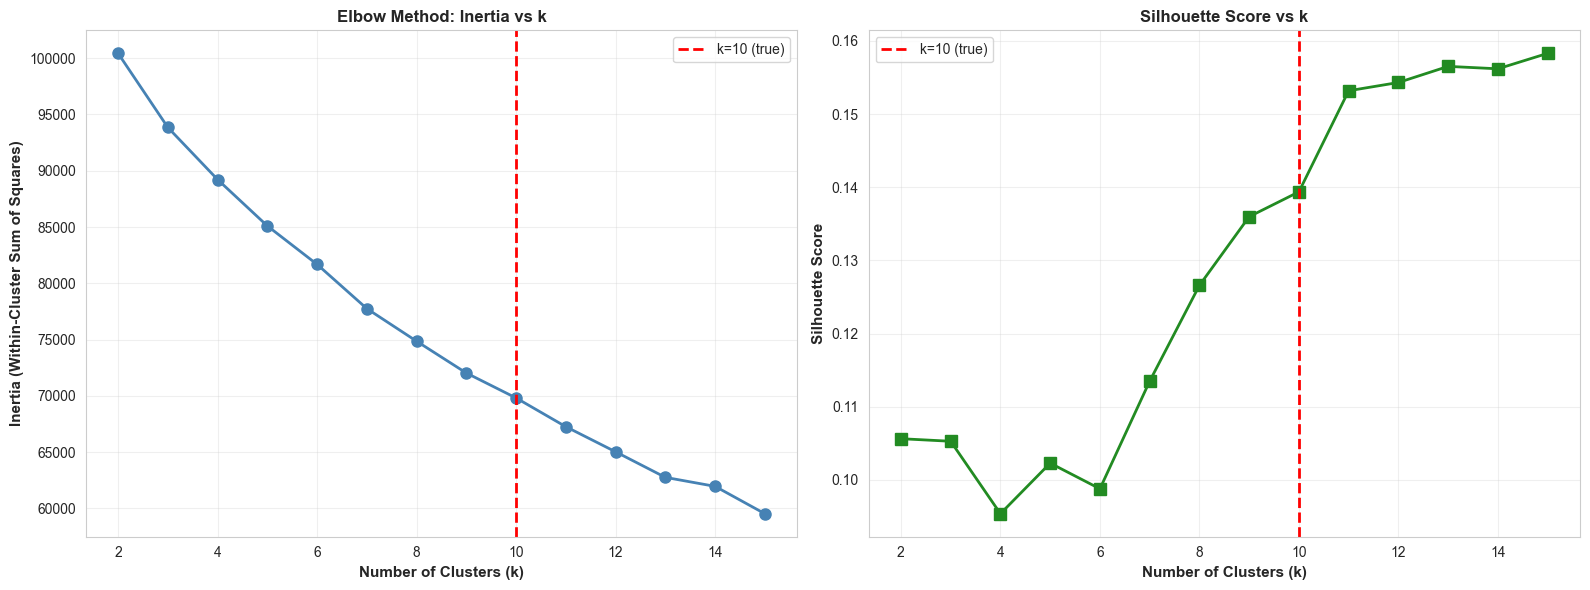


💡 Interpretation:
  • Elbow: Look for 'bend' where slope changes dramatically
  • Silhouette: Higher is better (peak suggests optimal k)
  • For this data, k=10 is reasonable (matches true digits)


In [13]:
# Elbow method
k_range = range(2, 16)
inertias = []
silhouettes = []

print("Running Elbow Method...")
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_digits_scaled)
    inertias.append(kmeans_temp.inertia_)
    silhouettes.append(silhouette_score(X_digits_scaled, kmeans_temp.labels_))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Elbow plot (Inertia)
axes[0].plot(k_range, inertias, 'o-', linewidth=2, markersize=8, color='steelblue')
axes[0].axvline(10, color='red', linestyle='--', linewidth=2, label='k=10 (true)')
axes[0].set_xlabel('Number of Clusters (k)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=11, fontweight='bold')
axes[0].set_title('Elbow Method: Inertia vs k', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# Silhouette score
axes[1].plot(k_range, silhouettes, 's-', linewidth=2, markersize=8, color='forestgreen')
axes[1].axvline(10, color='red', linestyle='--', linewidth=2, label='k=10 (true)')
axes[1].set_xlabel('Number of Clusters (k)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Silhouette Score', fontsize=11, fontweight='bold')
axes[1].set_title('Silhouette Score vs k', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("  • Elbow: Look for 'bend' where slope changes dramatically")
print("  • Silhouette: Higher is better (peak suggests optimal k)")
print("  • For this data, k=10 is reasonable (matches true digits)")

### Algorithm 2: DBSCAN (Density-Based Spatial Clustering)

#### What is DBSCAN?
Groups points that are **closely packed together**, marking outliers as noise.

#### How it works:
1. For each point, count neighbors within distance ε (epsilon)
2. **Core points**: Have ≥ min_samples neighbors
3. **Border points**: Within ε of core point but not core themselves  
4. **Noise points**: Neither core nor border
5. Connect core points within ε distance

#### Key Properties:
- ✅ **Finds arbitrary shapes**: Not limited to spherical clusters
- ✅ **No need for k**: Discovers number of clusters automatically
- ✅ **Handles noise**: Identifies outliers
- ✅ **Robust to outliers**: Noise doesn't affect clusters
- ❌ **Sensitive to parameters**: ε and min_samples critical
- ❌ **Struggles with varying densities**: Fixed ε problematic
- ❌ **Poor in high dimensions**: Distance becomes meaningless

#### When to use:
- Irregular cluster shapes
- Unknown number of clusters
- Need to identify outliers
- Clusters have similar density

#### Main Parameters:
- **eps (ε)**: Maximum distance between neighbors
- **min_samples**: Minimum points to form dense region

K-Means is more suitable for the digits dataset, while DBSCAN shines with spatial/geographical data or irregular cluster shapes.

Running DBSCAN...
DBSCAN Results:
  Number of clusters found: 4
  Number of noise points: 207


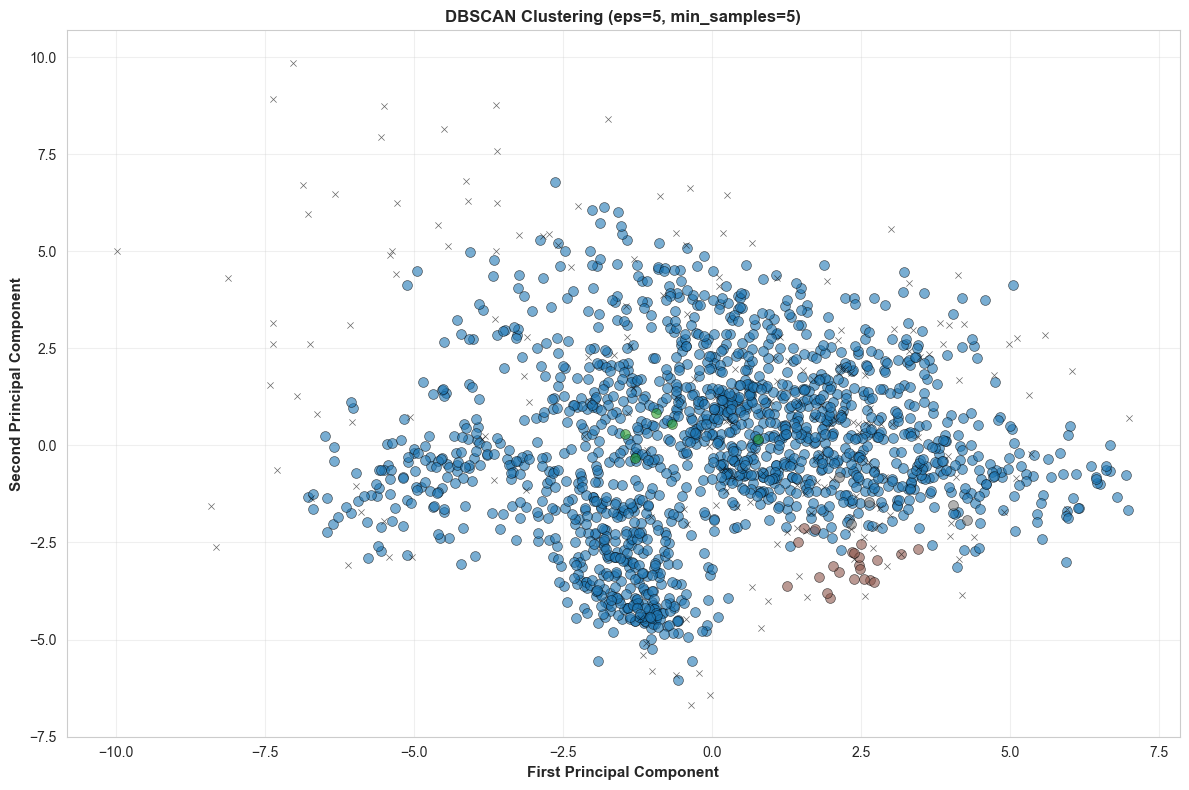


🔍 Observations:
  • DBSCAN automatically determines number of clusters
  • Identifies noise points (shown as 'x')
  • Can find clusters of arbitrary shape
  • Results highly dependent on eps and min_samples


In [14]:
# DBSCAN
print("Running DBSCAN...")
dbscan = DBSCAN(eps=5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_digits_scaled)

# Count clusters and noise
n_clusters_db = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise = list(y_dbscan).count(-1)

print("="*80)
print(f"DBSCAN Results:")
print(f"  Number of clusters found: {n_clusters_db}")
print(f"  Number of noise points: {n_noise}")
print("="*80)

# Visualize
fig, ax = plt.subplots(figsize=(12, 8))

# Plot clusters
unique_labels = set(y_dbscan)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise: black
        col = 'black'
        marker = 'x'
        size = 20
    else:
        marker = 'o'
        size = 50
    
    class_member_mask = (y_dbscan == k)
    xy = X_digits_2d[class_member_mask]
    ax.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size, 
               alpha=0.6, edgecolors='black', linewidth=0.5,
               label=f'Cluster {k}' if k != -1 else 'Noise')

ax.set_xlabel('First Principal Component', fontsize=11, fontweight='bold')
ax.set_ylabel('Second Principal Component', fontsize=11, fontweight='bold')
ax.set_title(f'DBSCAN Clustering (eps={dbscan.eps}, min_samples={dbscan.min_samples})',
             fontsize=12, fontweight='bold')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🔍 Observations:")
print("  • DBSCAN automatically determines number of clusters")
print("  • Identifies noise points (shown as 'x')")
print("  • Can find clusters of arbitrary shape")
print("  • Results highly dependent on eps and min_samples")

### Clustering Evaluation Metrics

#### When you DON'T have true labels:

| Metric | Range | Better | Meaning |
|--------|-------|--------|----------|
| **Silhouette Score** | [-1, 1] | Higher | How well separated are clusters? |
| **Davies-Bouldin Index** | [0, ∞) | Lower | Average similarity between clusters |
| **Calinski-Harabasz** | [0, ∞) | Higher | Ratio of between-cluster to within-cluster variance |

#### When you HAVE true labels (for validation):

| Metric | Range | Better | Meaning |
|--------|-------|--------|----------|
| **Adjusted Rand Index (ARI)** | [-1, 1] | Higher | Similarity between clusterings (adjusted for chance) |
| **Normalized Mutual Info (NMI)** | [0, 1] | Higher | Mutual information between clusterings |

## _Part 5: Cross-Validation & Hyperparameter Tuning_

### Cross-Validation

**Problem**: Single train-test split can be misleading (unlucky split)

**Solution**: **K-Fold Cross-Validation**

#### How K-Fold Works:
1. Split data into k folds (usually k=5 or k=10)
2. For each fold:
   - Use fold as test set
   - Use remaining k-1 folds as training set
   - Train and evaluate
3. Average results across all folds

#### Benefits:
- ✅ More reliable performance estimate
- ✅ Uses all data for both training and testing
- ✅ Reduces variance in performance estimate

#### When to use:
- Small to medium datasets
- Want robust performance estimate
- Before hyperparameter tuning

Running 5-Fold Cross-Validation on all models...
Logistic Regression : 0.9802 (+/- 0.0256)
K-Nearest Neighbors : 0.9670 (+/- 0.0417)
Decision Tree       : 0.9319 (+/- 0.0426)
Random Forest       : 0.9538 (+/- 0.0469)
SVM                 : 0.9714 (+/- 0.0357)
Naive Bayes         : 0.9319 (+/- 0.0088)
Gradient Boosting   : 0.9560 (+/- 0.0278)


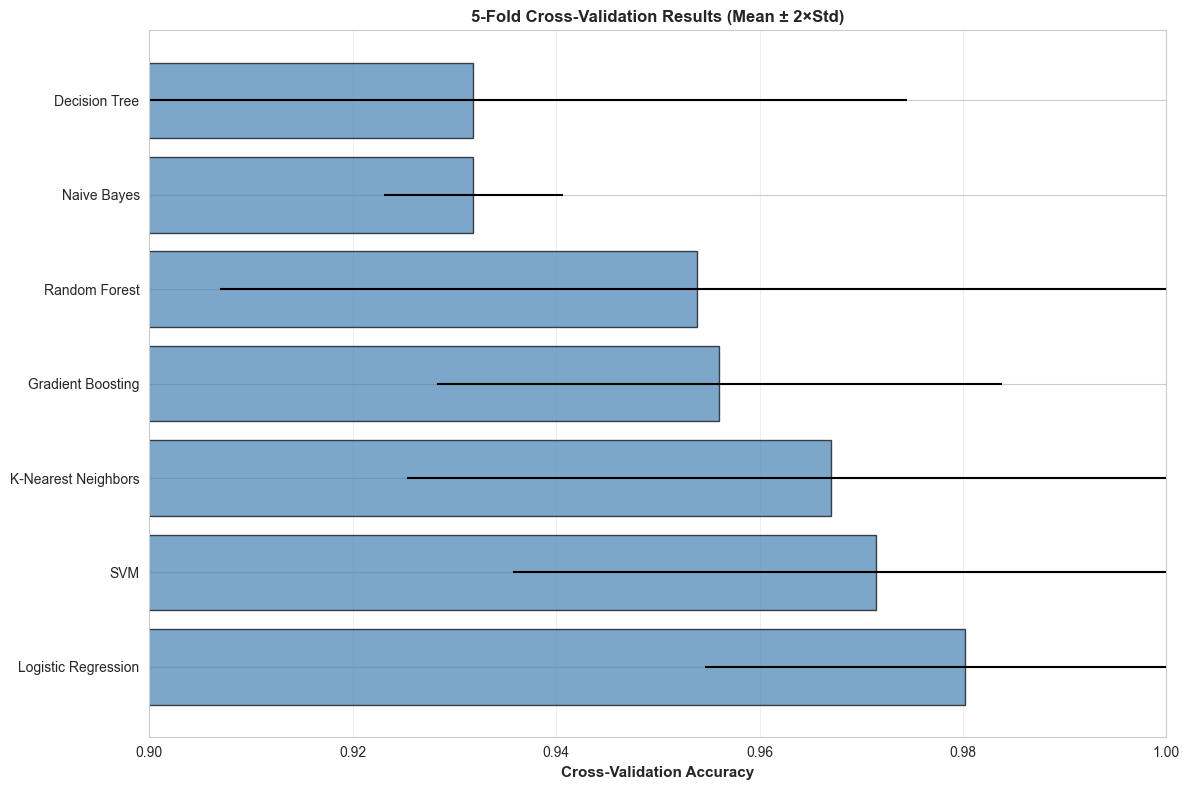


💡 Key Insight: Error bars show variability across folds
   Smaller error bars = more stable performance


In [15]:
# Cross-validation comparison
from sklearn.model_selection import cross_val_score

print("Running 5-Fold Cross-Validation on all models...")
print("="*80)

# Define models
models_cv = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=10000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

cv_results = []
for name, model in models_cv.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_results.append({
        'Model': name,
        'Mean CV Score': scores.mean(),
        'Std CV Score': scores.std(),
        'Min': scores.min(),
        'Max': scores.max()
    })
    print(f"{name:20s}: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")

print("="*80)

# Create DataFrame and visualize
cv_df = pd.DataFrame(cv_results)
cv_df = cv_df.sort_values('Mean CV Score', ascending=False)

fig, ax = plt.subplots(figsize=(12, 8))

y_pos = range(len(cv_df))
ax.barh(y_pos, cv_df['Mean CV Score'], xerr=cv_df['Std CV Score']*2,
        color='steelblue', edgecolor='black', alpha=0.7)
ax.set_yticks(y_pos)
ax.set_yticklabels(cv_df['Model'], fontsize=10)
ax.set_xlabel('Cross-Validation Accuracy', fontsize=11, fontweight='bold')
ax.set_title('5-Fold Cross-Validation Results (Mean ± 2×Std)', 
             fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.set_xlim([0.9, 1.0])

plt.tight_layout()
plt.show()

print("\n💡 Key Insight: Error bars show variability across folds")
print("   Smaller error bars = more stable performance")

### Hyperparameter Tuning with Grid Search

**Hyperparameters**: Settings that control the learning process (not learned from data)

**Examples:**
- KNN: n_neighbors
- SVM: C, gamma
- Random Forest: n_estimators, max_depth

**Grid Search**: Exhaustively tries all combinations of hyperparameters

#### How it works:
1. Define grid of hyperparameter values
2. For each combination:
   - Train model with cross-validation
   - Record performance
3. Return best combination

#### Benefits:
- ✅ Finds optimal hyperparameters automatically
- ✅ Uses cross-validation (robust)
- ✅ Systematic search

#### Drawbacks:
- ❌ Computationally expensive
- ❌ Exponential growth with parameters

In [16]:
# Grid Search example: Tune Random Forest
print("Running Grid Search for Random Forest...")
print("This may take a minute...\n")

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search with 3-fold CV (faster than 5-fold)
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("\n" + "="*80)
print("Grid Search Results:")
print(f"  Best parameters: {grid_search.best_params_}")
print(f"  Best CV score: {grid_search.best_score_:.4f}")
print(f"  Test set score: {grid_search.score(X_test_scaled, y_test):.4f}")
print("="*80)

# Show top 5 combinations
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values('rank_test_score')
print("\nTop 5 hyperparameter combinations:")
print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].head().to_string(index=False))

print("\n💡 Grid Search automatically found the best hyperparameters!")

Running Grid Search for Random Forest...
This may take a minute...

Fitting 3 folds for each of 36 candidates, totalling 108 fits

Grid Search Results:
  Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
  Best CV score: 0.9604
  Test set score: 0.9474

Top 5 hyperparameter combinations:
                                                          params  mean_test_score  std_test_score  rank_test_score
  {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}         0.960425        0.005497                1
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}         0.960425        0.005497                1
  {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}         0.960425        0.005497                1
  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}         0.960425        0.005497                1
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}         0.958232        0.006276       

## _Part 6: Model Selection Guidelines_

### Decision Tree for Classification

```
START: What is your goal?
│
├─ Need interpretability?
│  ├─ Linear relationships?
│  │  └─ USE: Logistic Regression
│  └─ Nonlinear patterns?
│     └─ USE: Decision Tree
│
├─ Want maximum accuracy?
│  ├─ Small dataset (< 10k)?
│  │  └─ USE: SVM or Gradient Boosting
│  └─ Large dataset?
│     └─ USE: Random Forest or Gradient Boosting
│
├─ Need fast predictions?
│  └─ USE: Logistic Regression or Naive Bayes
│
├─ Have irregular decision boundaries?
│  └─ USE: KNN or SVM (RBF kernel)
│
└─ Don't know what to try?
   └─ START: Logistic Regression (baseline)
      THEN: Random Forest (good default)
      FINALLY: Gradient Boosting (if need more accuracy)
```

### Decision Tree for Clustering

```
START: What do you know about your data?
│
├─ Know number of clusters (k)?
│  ├─ Spherical clusters?
│  │  └─ USE: K-Means (fast)
│
├─ Don't know k?
│  └─ Large dataset?
│     └─ USE: DBSCAN or K-Means + Elbow Method
│
├─ Have irregular shapes or noise?
│  └─ USE: DBSCAN
│
└─ Need to identify outliers?
   └─ USE: DBSCAN or Isolation Forest
```

### Quick Reference Table

| Scenario | Best Algorithm | Why |
|----------|----------------|-----|
| **Quick baseline** | Logistic Regression | Fast, interpretable |
| **Maximum accuracy** | Gradient Boosting / Random Forest | Ensemble power |
| **Need to explain** | Logistic Regression / Decision Tree | Interpretable |
| **High dimensions** | SVM / Random Forest | Handle many features |
| **Small dataset** | SVM / Naive Bayes | Work with limited data |
| **Large dataset** | Logistic Regression / Random Forest | Scalable |
| **Real-time prediction** | Logistic Regression / Naive Bayes | Fast inference |
| **Irregular boundaries** | KNN / SVM (RBF) / DBSCAN | Capture complex shapes |
| **Find outliers** | DBSCAN / Isolation Forest | Density-based |

### Common Workflow

**For Classification:**
1. Start with **Logistic Regression** (baseline)
2. Try **Random Forest** (good default)
3. If need more: **Gradient Boosting** with tuning
4. Compare with **SVM** if small-medium dataset

**For Clustering:**
1. Explore with **K-Means** (try different k)
2. Use **Elbow Method** or **Silhouette** to choose k
3. Try **DBSCAN** if you suspect irregular shapes
4. Visualize with **PCA/t-SNE** to validate results

## _Conclusion: Key Takeaways_

### What We Learned:

#### **Classification:**
- ✅ **Logistic Regression**: Fast baseline, linear boundaries
- ✅ **KNN**: Simple, nonlinear, lazy learner
- ✅ **Decision Tree**: Interpretable, prone to overfitting
- ✅ **Random Forest**: Robust ensemble, high accuracy
- ✅ **SVM**: Effective in high dimensions, kernel trick
- ✅ **Naive Bayes**: Fast, works with small data
- ✅ **Gradient Boosting**: State-of-the-art, needs tuning

#### **Clustering:**
- ✅ **K-Means**: Fast, spherical clusters, need k
- ✅ **DBSCAN**: Arbitrary shapes, finds noise, sensitive to parameters

#### **Evaluation:**
- ✅ **Metrics**: Accuracy, Precision, Recall, F1, Silhouette
- ✅ **Cross-validation**: More reliable than single split
- ✅ **Grid Search**: Automatic hyperparameter tuning

### Best Practices:

✅ **Always split train-test** (stratified for imbalanced data)

✅ **Scale features** for distance-based algorithms (KNN, SVM)

✅ **Start simple** (Logistic Regression), then increase complexity

✅ **Use cross-validation** for robust performance estimates

✅ **Choose metrics wisely** (F1 for imbalanced, Recall for medical)

✅ **Tune hyperparameters** with Grid Search or Random Search

✅ **Visualize results** (confusion matrix, learning curves)

⚠️ **Beware overfitting**: High train accuracy, low test accuracy

⚠️ **Don't trust single metric**: Look at multiple metrics

⚠️ **Domain matters**: Medical = high recall, Spam = high precision

### The "No Free Lunch" Theorem:

**No algorithm works best for all problems!**

- Try multiple algorithms
- Understand your data
- Consider domain requirements
- Balance accuracy, speed, interpretability

### Next Steps:

- Apply these models to your own datasets
- Experiment with different hyperparameters
- Combine with dimensionality reduction (PCA → Model)
- Learn about ensemble methods (stacking, blending)
- Explore deep learning for complex patterns

---

**Remember**: *The best model is the one that solves your problem effectively!* 🎯